# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

## ⚠️ AI-Generated Notebook Warning

**This notebook was generated by an AI. The code and analyses provided have not been fully verified. Please be cautious when interpreting the code or results and verify all important findings independently.**

## Overview

This notebook explores Dandiset 001375, which is a pilot study investigating the effects of disrupting septal GABAergic activity using Designer Receptors Exclusively Activated by Designer Drugs (DREADDs) on hippocampal and neocortical neural activity.

**Dandiset Link**: [https://dandiarchive.org/dandiset/001375](https://dandiarchive.org/dandiset/001375)

In this notebook, we will:
1. Load the Dandiset and explore its basic metadata
2. Examine the structure of the NWB files in the dataset
3. Visualize electrophysiology data from recordings in the ventral hippocampus and visual cortex
4. Analyze spike timing data across multiple units
5. Explore trial-related data from behavioral experiments

## Required Packages

This notebook requires the following packages:

- `dandi` - For interacting with the DANDI archive
- `pynwb` - For working with Neurodata Without Borders (NWB) files
- `h5py` - For working with HDF5 files
- `remfile` - For remote file access
- `numpy` - For numerical operations
- `pandas` - For data manipulation and analysis
- `matplotlib` - For basic plotting
- `seaborn` - For enhanced visualizations

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
from matplotlib.ticker import MaxNLocator
from datetime import datetime
import time

# Set seaborn style for most plots
sns.set_theme()

## Connecting to the DANDI Archive and Exploring the Dandiset

In [2]:
# Connect to the DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset ID: {metadata['identifier']}")
print(f"Version: {metadata['version']}")
print(f"Description: {metadata['description']}")

# Handle contributors which might be complex objects
if 'contributor' in metadata:
    contributors = []
    for item in metadata['contributor']:
        if isinstance(item, str):
            contributors.append(item)
        elif isinstance(item, dict) and 'name' in item:
            contributors.append(item['name'])
        else:
            contributors.append(str(item))
    print(f"Contributors: {', '.join(contributors) if contributors else 'None specified'}")

print(f"Date created: {metadata['dateCreated']}")

# Handle license information
if 'license' in metadata:
    license_info = []
    for item in metadata['license']:
        if isinstance(item, str):
            license_info.append(item)
        elif isinstance(item, dict) and 'name' in item:
            license_info.append(item['name'])
        else:
            license_info.append(str(item))
    print(f"License: {', '.join(license_info) if license_info else 'None specified'}")

# Handle variable measured information
if 'variableMeasured' in metadata:
    variables = []
    for item in metadata['variableMeasured']:
        if isinstance(item, str):
            variables.append(item)
        elif isinstance(item, dict) and 'name' in item:
            variables.append(item['name'])
        else:
            variables.append(str(item))
    print(f"Variables measured: {', '.join(variables) if variables else 'None specified'}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset ID: DANDI:001375
Version: 0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Contributors: Eckert, Michael, NIH Brain, McNaughton, Bruce, Ferbinteanu, Janina
Date created: 2025-04-05T16:33:36.070433+00:00
License: spdx:CC-BY-4.0


## Exploring Assets in the Dandiset

In [3]:
# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"Found {len(assets)} assets in the dataset")

# Create a DataFrame to display asset information
asset_info = []
for asset in assets:
    # Get basic info that should be available
    info = {
        'path': asset.path,
        'size_GB': asset.size / (1024**3),  # Convert bytes to GB
        'id': asset.identifier
    }
    
    # Try to get content type safely
    try:
        metadata = asset.get_metadata()
        if hasattr(metadata, 'get'):
            info['content_type'] = metadata.get('encodingFormat', 'Unknown')
        else:
            info['content_type'] = 'Unknown'
    except Exception as e:
        info['content_type'] = f"Error: {str(e)}"
        
    asset_info.append(info)

asset_df = pd.DataFrame(asset_info)
print("\nAsset information:")
display(asset_df)

Found 3 assets in the dataset

Asset information:


,path,size_GB,id,content_type
0,sub-MS13B/sub-MS13B_ses-20240725T190000_ecephy...,51.195496,ce525828-8534-4b56-9e47-d2a34d1aa897,Unknown
1,sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12...,64.676313,376dc673-611b-4521-b135-9ec01c7f4f74,Unknown
2,sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ar...,64.995961,fea95c0e-2f07-49a3-b607-4b7e9f278e16,Unknown


The dataset contains 3 NWB files from experiments with subjects MS13B and MS14A. These files contain electrophysiology data recorded from the ventral hippocampus and visual cortex during experiments where septal GABAergic activity was disrupted using DREADDs.

Let's examine one of these NWB files in detail.

## Loading and Exploring an NWB File

We'll first load one of the NWB files to explore its structure and content. We'll start with the file from subject MS13B.

In [4]:
# URL for the NWB file to explore
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
print(f"Loading NWB file: {url}")

# Create a loading timer to track how long operations take
start_time = time.time()

# Load the NWB file using remfile to stream it from the DANDI archive
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"File loaded in {time.time() - start_time:.2f} seconds")

# Display the NWB file's basic metadata
print(f"\nNWB File Metadata:")
print(f"Identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"File creation date: {nwb.file_create_date[0]}")

Loading NWB file: https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


File loaded in 0.70 seconds

NWB File Metadata:
Identifier: MS13B
Session description: mouse running laps in virtual hallway
Session start time: 2024-07-25 19:00:00-07:00
File creation date: 2025-04-05 16:50:15.663983-07:00


### Explore the Subject Information

In [5]:
# Display information about the subject
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Age: {subject.age}")
print(f"Description: {subject.description}")

Subject ID: MS13B
Species: Mus musculus
Sex: M
Age: P90D
Description: medial septum DREADD to suppress GABA interneurons


### Exploring the Electrode Setup

In [6]:
# Get information about electrode groups
electrode_groups = nwb.electrode_groups
print(f"Number of electrode groups: {len(electrode_groups)}")

for name, group in electrode_groups.items():
    print(f"\nGroup name: {name}")
    print(f"Description: {group.description}")
    print(f"Location: {group.location}")
    print(f"Device: {group.device.description} (Manufacturer: {group.device.manufacturer})")

# Get a preview of the electrodes table
electrodes_df = nwb.electrodes.to_dataframe()
print(f"\nNumber of electrodes: {len(electrodes_df)}")
print("\nElectrodes preview (first 5 rows):")
display(electrodes_df.head())

Number of electrode groups: 2

Group name: shank1
Description: shank1, electrodes
Location: ventral hippocampus, visual cortex
Device: 128 ch silicon probe (Manufacturer: UCLA)

Group name: shank2
Description: shank2, electrodes
Location: ventral hippocampus, visual cortex
Device: 128 ch silicon probe (Manufacturer: UCLA)

Number of electrodes: 256

Electrodes preview (first 5 rows):


,x,y,location,filtering,group,group_name,label
id,,,,,,,
0,20.0,1375.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14065...,shank1,shank1-electrode001
1,20.0,1325.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14065...,shank1,shank1-electrode002
2,20.0,1275.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14065...,shank1,shank1-electrode003
3,20.0,1225.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14065...,shank1,shank1-electrode004
4,20.0,1175.0,unknown,0.1 - 7500.0 Hz,shank1 pynwb.ecephys.ElectrodeGroup at 0x14065...,shank1,shank1-electrode005


### Exploring Trial Information

Number of trials: 387

Trials preview (first 5 rows):


,start_time,stop_time
id,,
0,4.323800,16.929833
1,16.963067,28.414333
2,28.447100,39.402833
3,39.435833,50.027033
4,50.059667,63.064467


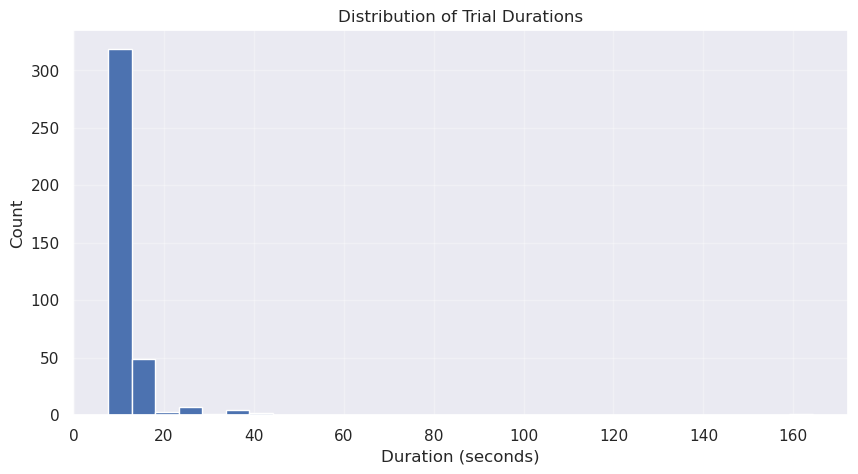

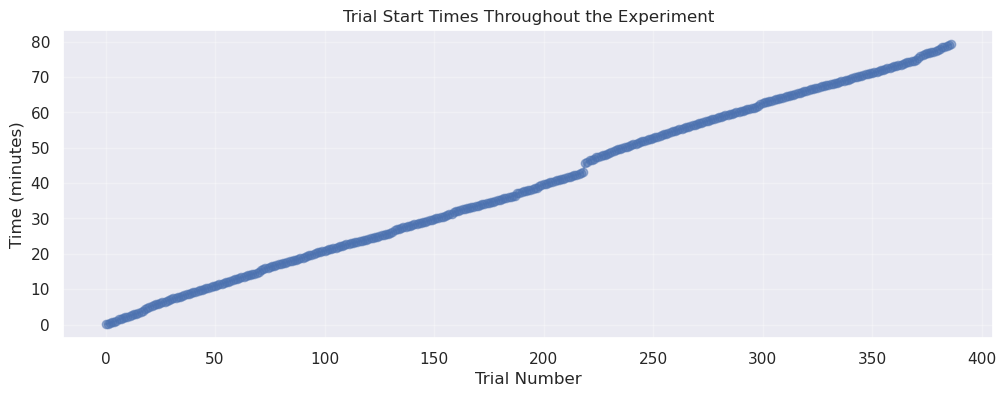

In [7]:
# Get information about trials
trials_df = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials_df)}")
print("\nTrials preview (first 5 rows):")
display(trials_df.head())

# Calculate trial durations
trials_df['duration'] = trials_df['stop_time'] - trials_df['start_time']

# Plot trial durations
plt.figure(figsize=(10, 5))
plt.hist(trials_df['duration'], bins=30)
plt.title('Distribution of Trial Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

# Plot trial start times to see the experiment timeline
plt.figure(figsize=(12, 4))
plt.plot(range(len(trials_df)), trials_df['start_time'] / 60, 'o-', alpha=0.5)
plt.title('Trial Start Times Throughout the Experiment')
plt.xlabel('Trial Number')
plt.ylabel('Time (minutes)')
plt.grid(True, alpha=0.3)
plt.show()

### Exploring Units (Sorted Neurons)

In [8]:
# Get information about units (sorted neurons)
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")
print("\nUnits preview:")
display(units_df.head())

Number of units: 33

Units preview:


,spike_times
id,
1,"[3.5485, 3.5543666666666667, 3.784666666666667..."
2,"[0.1826, 0.21976666666666667, 0.77823333333333..."
3,"[0.005533333333333334, 0.01633333333333333, 0...."
4,"[0.5452333333333333, 0.5632, 0.572833333333333..."
5,"[0.07036666666666666, 0.1002, 0.17066666666666..."


Let's examine some of the spike times from the units:

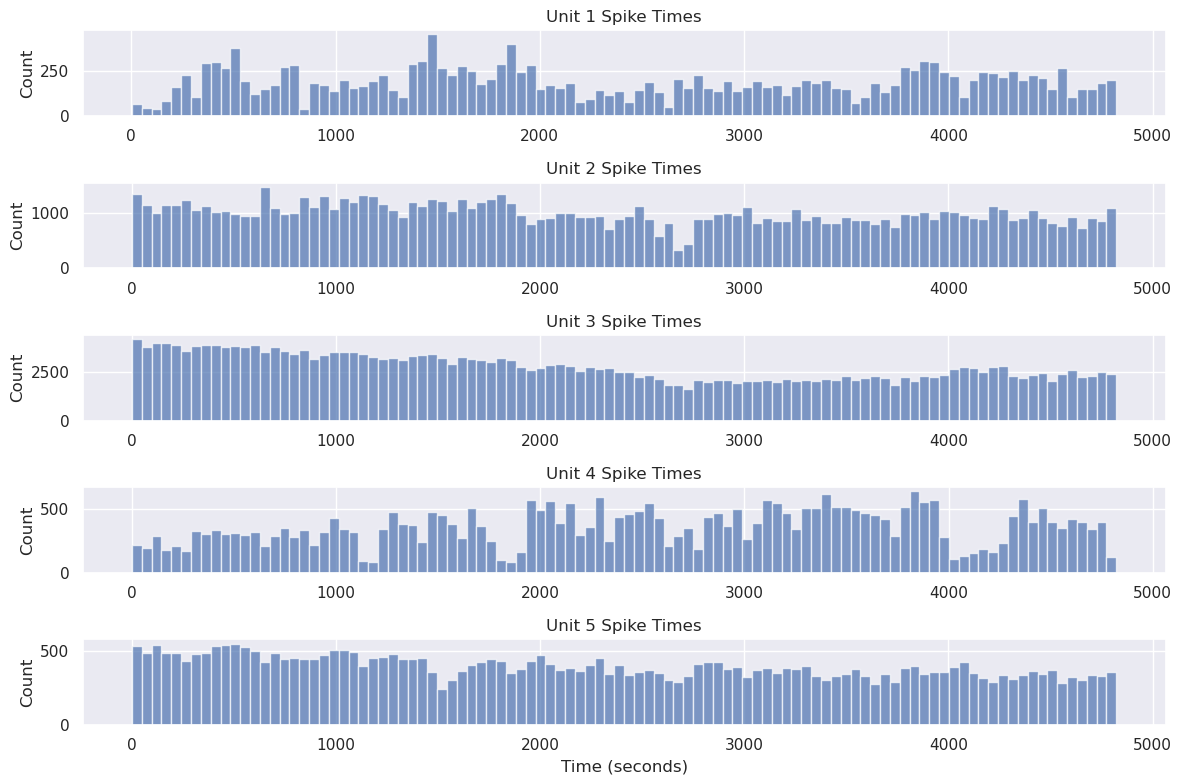

Unit 1: 18960 spikes
Unit 2: 100435 spikes
Unit 3: 278061 spikes
Unit 4: 36265 spikes
Unit 5: 39735 spikes


In [9]:
# Helper function to safely get spike times for a unit
def get_spike_times(units, unit_id):
    """Extract spike times for a specific unit"""
    return units['spike_times'][unit_id]

# Get spike times for the first few units
display_unit_count = min(5, len(units_df))
spike_counts = []

plt.figure(figsize=(12, 8))
for i in range(display_unit_count):
    unit_id = nwb.units.id[i]
    spike_times = get_spike_times(nwb.units, i)
    spike_counts.append(len(spike_times))
    
    plt.subplot(display_unit_count, 1, i+1)
    if len(spike_times) > 0:
        plt.hist(spike_times, bins=100, alpha=0.7)
    plt.title(f'Unit {unit_id} Spike Times')
    plt.ylabel('Count')
    if i == display_unit_count-1:
        plt.xlabel('Time (seconds)')
    
plt.tight_layout()
plt.show()

# Print spike counts
for i in range(display_unit_count):
    unit_id = nwb.units.id[i]
    print(f"Unit {unit_id}: {spike_counts[i]} spikes")

### Visualizing Raw Electrophysiology Data

Now, let's examine some of the raw electrophysiological data. Since the dataset is large and we're streaming it remotely, we'll look at a small subset of the data.

Time series information:
Sampling rate: 30000.0 Hz
Number of channels: 256
Total recording length: 4822.52 seconds
Units: mV

Loading 1 second(s) of data from channels [0, 1, 2, 3]...


Data loaded in 0.28 seconds


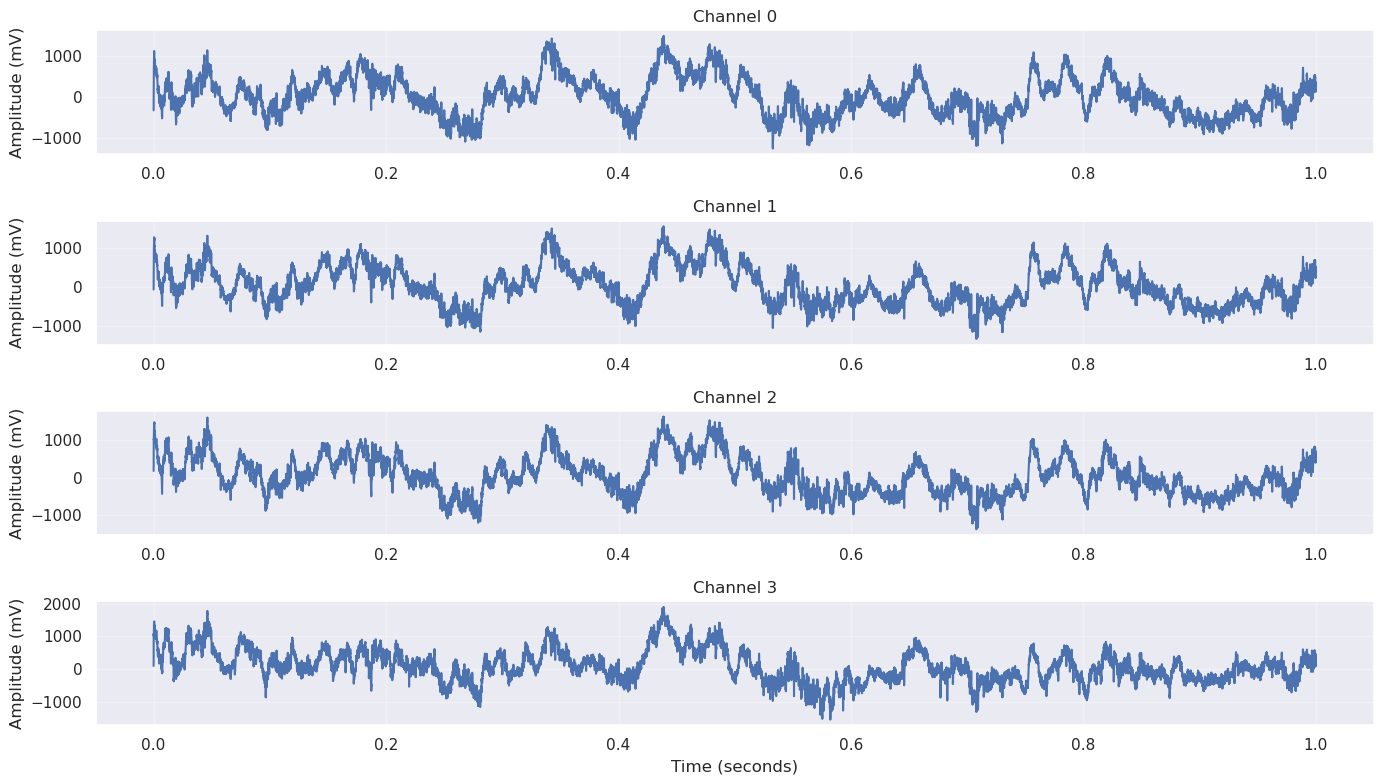

In [10]:
# Access the time series data
time_series = nwb.acquisition['time_series']
print(f"Time series information:")
print(f"Sampling rate: {time_series.rate} Hz")
print(f"Number of channels: {time_series.data.shape[1]}")
print(f"Total recording length: {time_series.data.shape[0] / time_series.rate:.2f} seconds")
print(f"Units: {time_series.unit}")

# Sample a small subset of the data for visualization
# Get 1 second of data from a few channels
start_sample = 0
duration_seconds = 1
num_samples = int(duration_seconds * time_series.rate)
sample_channels = [0, 1, 2, 3]  # Just the first few channels

print(f"\nLoading {duration_seconds} second(s) of data from channels {sample_channels}...")
start_time = time.time()

# Load the data
sample_data = time_series.data[start_sample:start_sample+num_samples, sample_channels]
time_points = np.arange(sample_data.shape[0]) / time_series.rate

print(f"Data loaded in {time.time() - start_time:.2f} seconds")

# Plot the data
plt.figure(figsize=(14, 8))
for i, channel in enumerate(sample_channels):
    plt.subplot(len(sample_channels), 1, i+1)
    plt.plot(time_points, sample_data[:, i])
    plt.title(f'Channel {channel}')
    plt.ylabel('Amplitude (mV)')
    if i == len(sample_channels)-1:
        plt.xlabel('Time (seconds)')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Visualizing Spike Timing in Relation to Trials

Let's explore the relationship between unit activity and trial timing by plotting spike times aligned with trial boundaries.

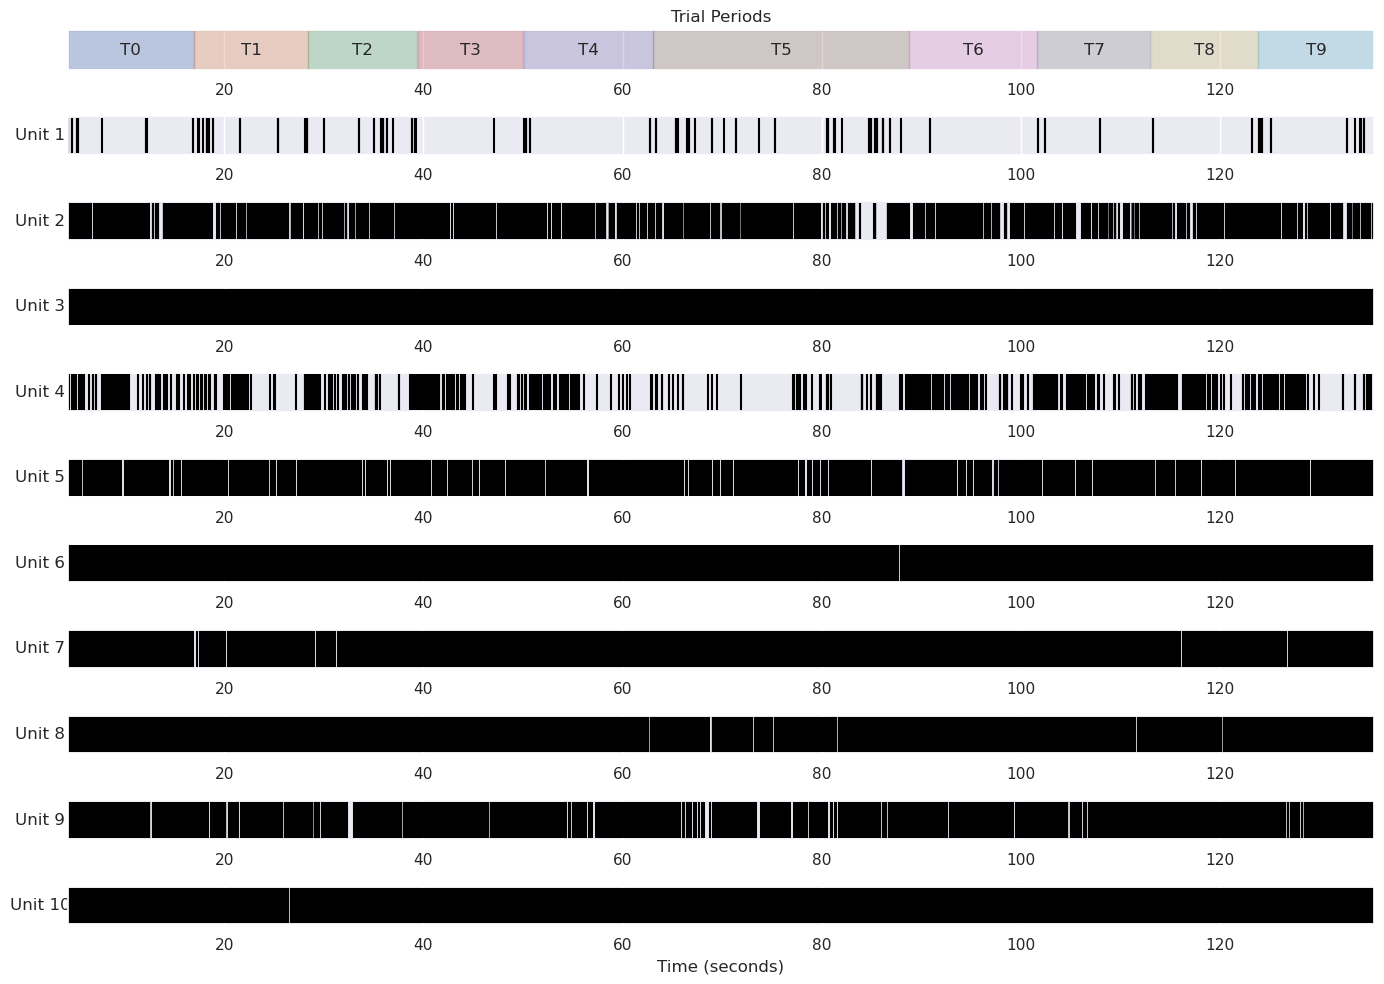

In [11]:
# Select a subset of trials to visualize
trial_start = 0
num_trials_to_plot = 10
selected_trials = trials_df.iloc[trial_start:trial_start+num_trials_to_plot]

# Select a subset of units to visualize
units_to_plot = 10
if len(nwb.units.id) < units_to_plot:
    units_to_plot = len(nwb.units.id)

plt.figure(figsize=(14, 10))

# Create a subplot for trials
ax1 = plt.subplot(units_to_plot + 1, 1, 1)
for i, (idx, trial) in enumerate(selected_trials.iterrows()):
    ax1.axvspan(trial['start_time'], trial['stop_time'], alpha=0.3, color=f'C{i%10}')
    # Add trial number in the middle of each trial
    trial_mid = (trial['start_time'] + trial['stop_time']) / 2
    ax1.text(trial_mid, 0.5, f"T{i}", ha='center', va='center')

ax1.set_yticks([])
ax1.set_title('Trial Periods')
ax1.set_xlim(selected_trials.iloc[0]['start_time'], selected_trials.iloc[-1]['stop_time'])

# Plot spike times for selected units
for i in range(units_to_plot):
    unit_id = nwb.units.id[i]
    ax = plt.subplot(units_to_plot + 1, 1, i + 2, sharex=ax1)
    
    spike_times = get_spike_times(nwb.units, i)
    
    # Filter spike times to only those within our trial range
    mask = (spike_times >= selected_trials.iloc[0]['start_time']) & (spike_times <= selected_trials.iloc[-1]['stop_time'])
    filtered_spike_times = spike_times[mask]
    
    # Plot the spike times as vertical lines
    if len(filtered_spike_times) > 0:
        plt.vlines(filtered_spike_times, 0, 1, color='black')
    
    plt.yticks([])
    plt.ylabel(f'Unit {unit_id}', rotation=0, labelpad=20, va='center')
    
    # Only show x-label for the bottom plot
    if i == units_to_plot - 1:
        plt.xlabel('Time (seconds)')

plt.tight_layout()
plt.show()

### Analyzing Spike Rates Across Trials

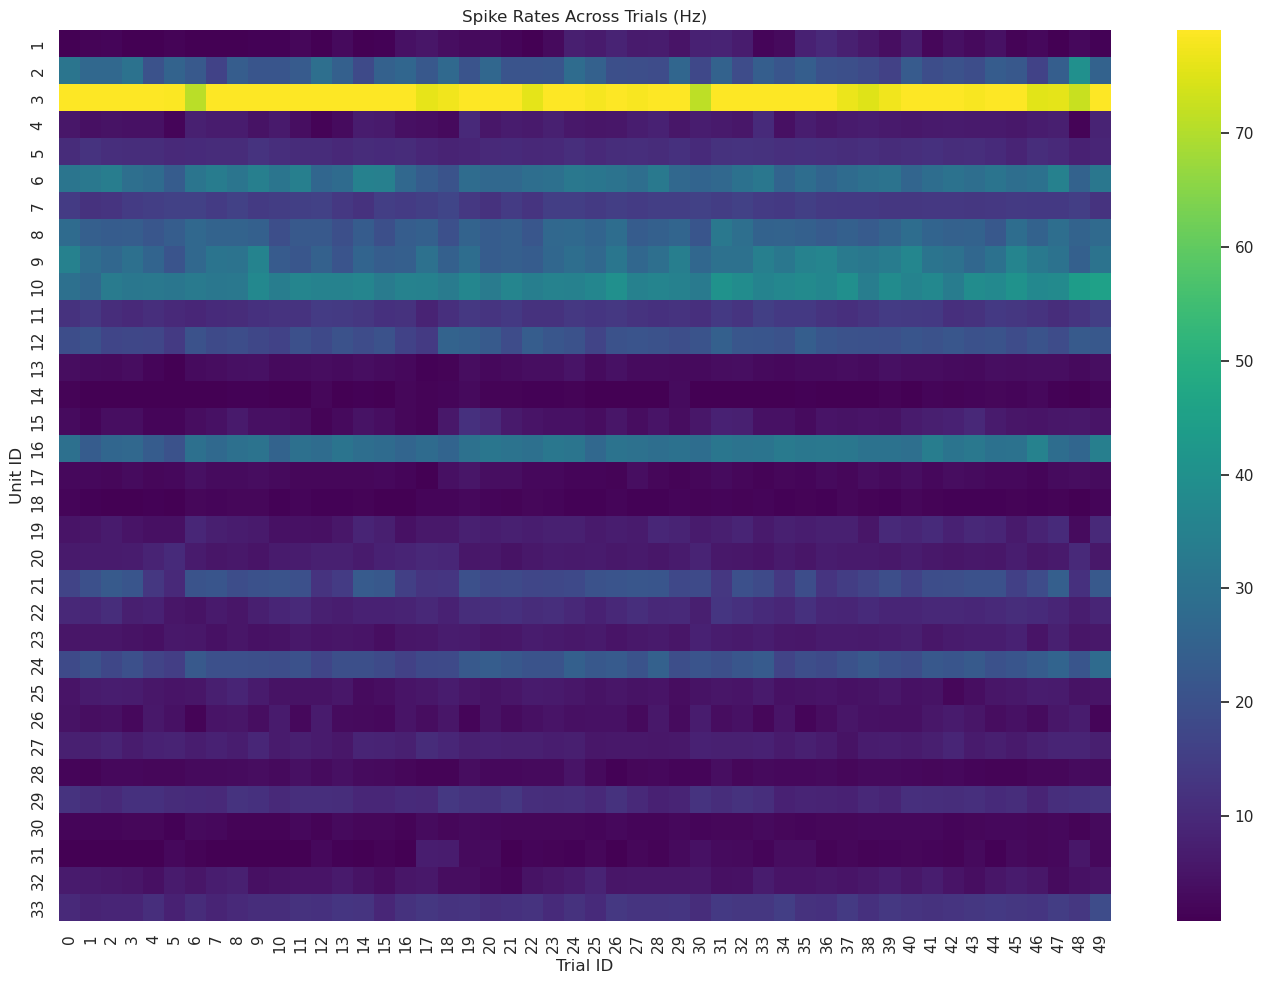

In [12]:
# Calculate spike rates for each unit during trials
def calculate_spike_rates(units, trials_df):
    rates = []
    unit_ids = []
    trial_ids = []
    
    for i in range(len(units.id)):
        unit_id = units.id[i]
        spike_times = get_spike_times(units, i)
        
        for trial_idx, trial in trials_df.iterrows():
            start = trial['start_time']
            stop = trial['stop_time']
            duration = stop - start
            
            # Count spikes in this trial
            spikes_in_trial = sum((spike_times >= start) & (spike_times < stop))
            rate = spikes_in_trial / duration if duration > 0 else 0
            
            rates.append(rate)
            unit_ids.append(unit_id)
            trial_ids.append(trial_idx)
            
    return pd.DataFrame({
        'unit_id': unit_ids,
        'trial_id': trial_ids,
        'spike_rate': rates
    })

# Get spike rates for the first 50 trials
first_n_trials = 50
spike_rates = calculate_spike_rates(nwb.units, trials_df.iloc[:first_n_trials])

# Reshape for heatmap plotting
pivot_df = spike_rates.pivot(index='unit_id', columns='trial_id', values='spike_rate')

# Plot spike rates as a heatmap
plt.figure(figsize=(14, 10))
ax = sns.heatmap(pivot_df, cmap='viridis', robust=True)
plt.title('Spike Rates Across Trials (Hz)')
plt.xlabel('Trial ID')
plt.ylabel('Unit ID')
plt.tight_layout()
plt.show()

## Exploring a Second NWB File

Now let's examine data from the second subject, MS14A. This will allow us to compare the neural activity patterns between different subjects or experimental conditions.

In [13]:
# URL for the second NWB file
url2 = "https://api.dandiarchive.org/api/assets/376dc673-611b-4521-b135-9ec01c7f4f74/download/"
print(f"Loading second NWB file: {url2}")

# Create a link to view this NWB file on Neurosift
neurosift_url = f"https://neurosift.app/nwb?url={url2}&dandisetId=001375&dandisetVersion=draft"
print(f"Neurosift URL for visualization: {neurosift_url}")

# Load the NWB file
start_time = time.time()
remote_file2 = remfile.File(url2)
h5_file2 = h5py.File(remote_file2)
io2 = pynwb.NWBHDF5IO(file=h5_file2)
nwb2 = io2.read()
print(f"File loaded in {time.time() - start_time:.2f} seconds")

# Display the NWB file's basic metadata
print(f"\nNWB File Metadata:")
print(f"Identifier: {nwb2.identifier}")
print(f"Session description: {nwb2.session_description}")
print(f"Session start time: {nwb2.session_start_time}")

Loading second NWB file: https://api.dandiarchive.org/api/assets/376dc673-611b-4521-b135-9ec01c7f4f74/download/
Neurosift URL for visualization: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/376dc673-611b-4521-b135-9ec01c7f4f74/download/&dandisetId=001375&dandisetVersion=draft


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


File loaded in 0.68 seconds

NWB File Metadata:
Identifier: MS14A
Session description: mouse running laps in virtual hallway
Session start time: 2024-09-06 19:00:00-07:00


### Comparing Units Between the Two Files

In [14]:
# Compare the number of units between the two files
units1_df = nwb.units.to_dataframe()
units2_df = nwb2.units.to_dataframe()

print(f"Subject {nwb.identifier}: {len(units1_df)} units")
print(f"Subject {nwb2.identifier}: {len(units2_df)} units")

# Compare trial counts
trials1_df = nwb.trials.to_dataframe()
trials2_df = nwb2.trials.to_dataframe()

print(f"\nSubject {nwb.identifier}: {len(trials1_df)} trials")
print(f"Subject {nwb2.identifier}: {len(trials2_df)} trials")

Subject MS13B: 33 units
Subject MS14A: 68 units

Subject MS13B: 387 trials
Subject MS14A: 716 trials


### Comparing Spike Timing Patterns

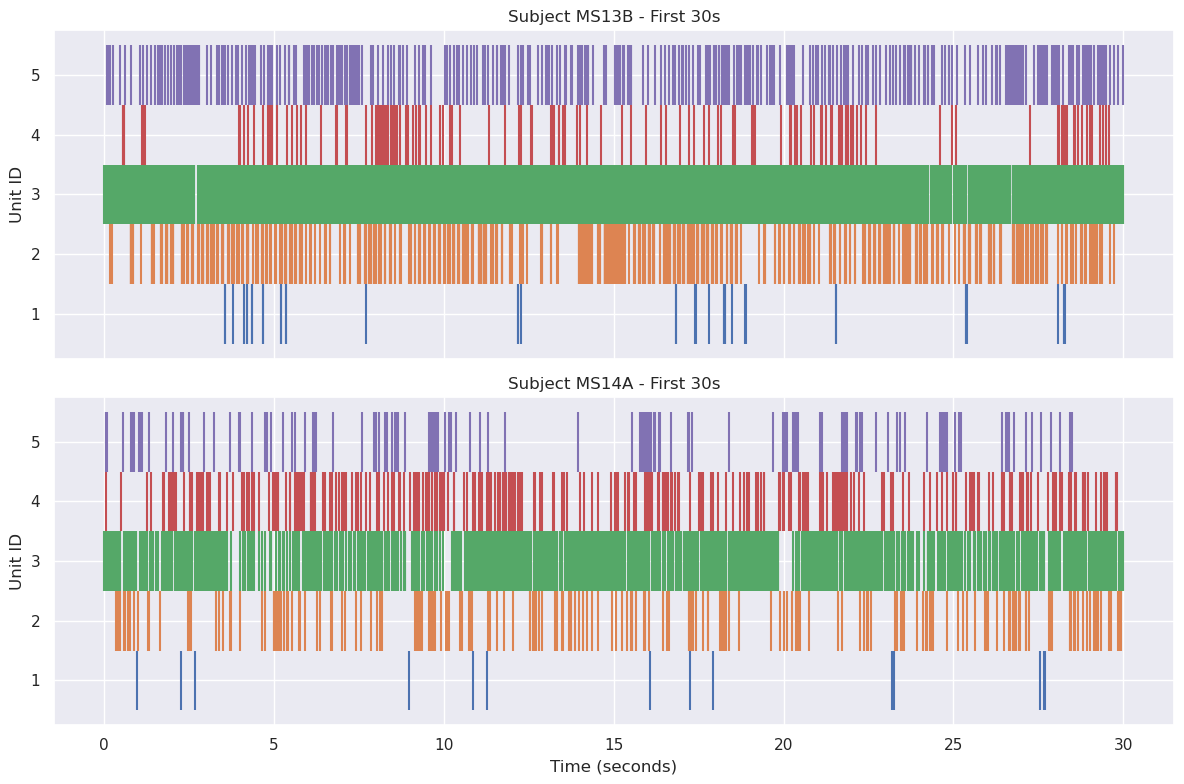

Spike counts for first 30s:
Subject MS13B, Unit 0: 39 spikes
Subject MS13B, Unit 1: 856 spikes
Subject MS13B, Unit 2: 2639 spikes
Subject MS13B, Unit 3: 140 spikes
Subject MS13B, Unit 4: 347 spikes
Subject MS14A, Unit 0: 14 spikes
Subject MS14A, Unit 1: 205 spikes
Subject MS14A, Unit 2: 865 spikes
Subject MS14A, Unit 3: 287 spikes
Subject MS14A, Unit 4: 138 spikes


In [15]:
# Compare spike timing patterns between subjects
def compare_spike_patterns(nwb1, nwb2, duration=30):
    """Compare spike patterns between two NWB files for the specified duration (in seconds)"""
    # Prepare subplots
    fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    
    # Plot for first subject
    spike_counts1 = []
    for i in range(min(5, len(nwb1.units.id))):
        spike_times = get_spike_times(nwb1.units, i)
        mask = spike_times < duration
        spike_counts1.append(sum(mask))
        axs[0].vlines(spike_times[mask], i + 0.5, i + 1.5, color=f'C{i}')
    
    # Plot for second subject
    spike_counts2 = []
    for i in range(min(5, len(nwb2.units.id))):
        spike_times = get_spike_times(nwb2.units, i)
        mask = spike_times < duration
        spike_counts2.append(sum(mask))
        axs[1].vlines(spike_times[mask], i + 0.5, i + 1.5, color=f'C{i}')
    
    # Labels and formatting
    axs[0].set_title(f'Subject {nwb1.identifier} - First {duration}s')
    axs[1].set_title(f'Subject {nwb2.identifier} - First {duration}s')
    
    axs[0].set_yticks(range(1, min(5, len(nwb1.units.id))+1))
    axs[1].set_yticks(range(1, min(5, len(nwb2.units.id))+1))
    
    axs[0].set_ylabel('Unit ID')
    axs[1].set_ylabel('Unit ID')
    axs[1].set_xlabel('Time (seconds)')
    
    plt.tight_layout()
    plt.show()
    
    # Print spike counts
    print(f"Spike counts for first {duration}s:")
    for i in range(min(5, len(nwb1.units.id))):
        print(f"Subject {nwb1.identifier}, Unit {i}: {spike_counts1[i]} spikes")
    for i in range(min(5, len(nwb2.units.id))):
        print(f"Subject {nwb2.identifier}, Unit {i}: {spike_counts2[i]} spikes")

# Compare spike patterns for the first 30 seconds
compare_spike_patterns(nwb, nwb2, duration=30)

### Examining Raw Data from the Second File

Loading 1 second(s) of data from channels [0, 1, 2, 3]...


Data loaded in 0.40 seconds


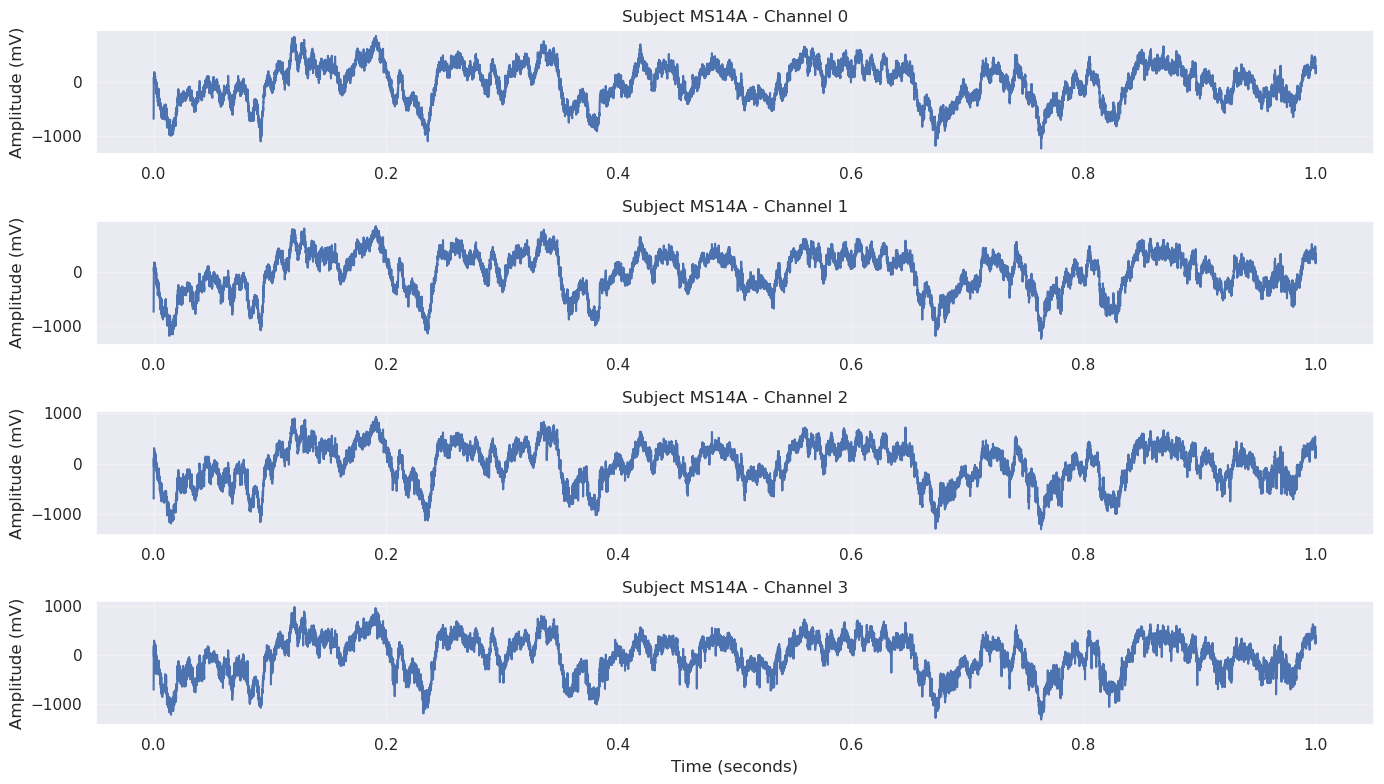

In [16]:
# Sample a small subset of the data from the second subject
time_series2 = nwb2.acquisition['time_series']
start_sample = 0
duration_seconds = 1
num_samples = int(duration_seconds * time_series2.rate)
sample_channels = [0, 1, 2, 3]  # Just the first few channels

print(f"Loading {duration_seconds} second(s) of data from channels {sample_channels}...")
start_time = time.time()

# Load the data
sample_data2 = time_series2.data[start_sample:start_sample+num_samples, sample_channels]
time_points = np.arange(sample_data2.shape[0]) / time_series2.rate

print(f"Data loaded in {time.time() - start_time:.2f} seconds")

# Plot the data
plt.figure(figsize=(14, 8))
for i, channel in enumerate(sample_channels):
    plt.subplot(len(sample_channels), 1, i+1)
    plt.plot(time_points, sample_data2[:, i])
    plt.title(f'Subject {nwb2.identifier} - Channel {channel}')
    plt.ylabel('Amplitude (mV)')
    if i == len(sample_channels)-1:
        plt.xlabel('Time (seconds)')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Comparing Trial Durations Between Subjects

/tmp/ipykernel_6785/2384368333.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


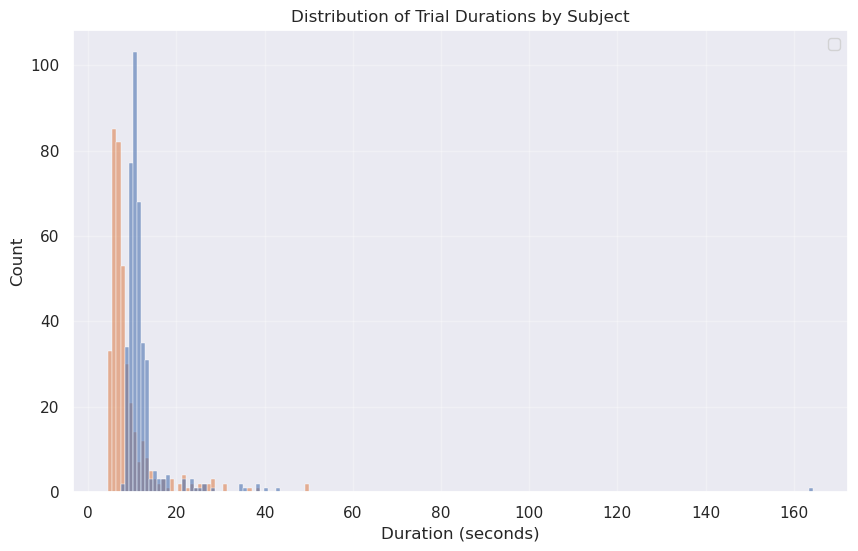

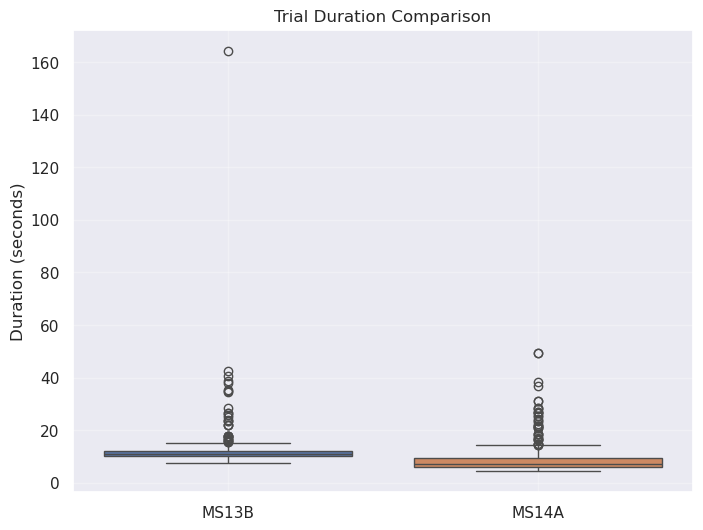

Trial Duration Summary Statistics (seconds):


,MS13B,MS14A
count,387.000000,387.000000
mean,12.300654,9.176027
std,8.968260,5.922346
min,7.656600,4.519200
25%,9.964817,6.104700
50%,10.857600,7.228433
75%,12.095133,9.387517
max,164.306967,49.204000


In [17]:
# Calculate trial durations for both subjects
trials1_df = nwb.trials.to_dataframe().reset_index(drop=True)
trials2_df = nwb2.trials.to_dataframe().reset_index(drop=True)

trials1_df['duration'] = trials1_df['stop_time'] - trials1_df['start_time']
trials2_df['duration'] = trials2_df['stop_time'] - trials2_df['start_time']

# Create separate Series with clean indices
trials1_durations = trials1_df['duration'].reset_index(drop=True)
if len(trials2_df) > len(trials1_df):
    trials2_durations = trials2_df['duration'].sample(n=len(trials1_df), replace=True).reset_index(drop=True)
else:
    trials2_durations = trials2_df['duration'].reset_index(drop=True)

# Create a DataFrame for comparison
trial_durations = pd.DataFrame({
    f'{nwb.identifier}': trials1_durations,
    f'{nwb2.identifier}': trials2_durations
})

# Plot the distributions
plt.figure(figsize=(10, 6))
sns.histplot(data=trial_durations, alpha=0.6)
plt.title('Distribution of Trial Durations by Subject')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Create a boxplot for comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=trial_durations)
plt.title('Trial Duration Comparison')
plt.ylabel('Duration (seconds)')
plt.grid(True, alpha=0.3)
plt.show()

# Print summary statistics
print("Trial Duration Summary Statistics (seconds):")
display(trial_durations.describe())

## Spatial Analysis of Electrodes

Let's examine the spatial arrangement of the electrodes in the recordings.

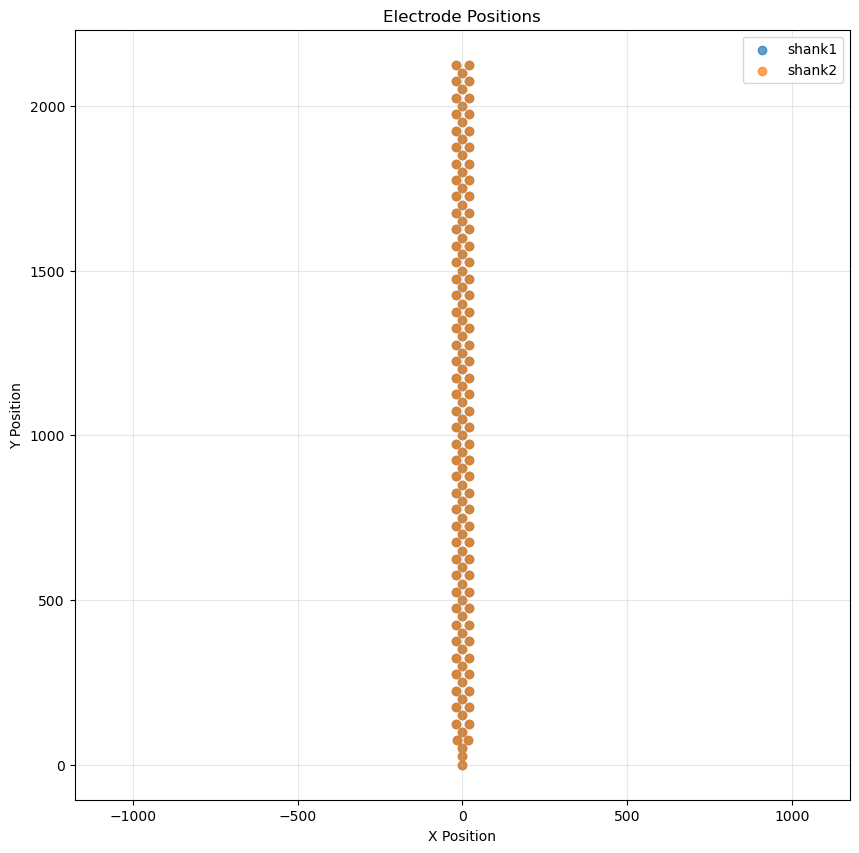

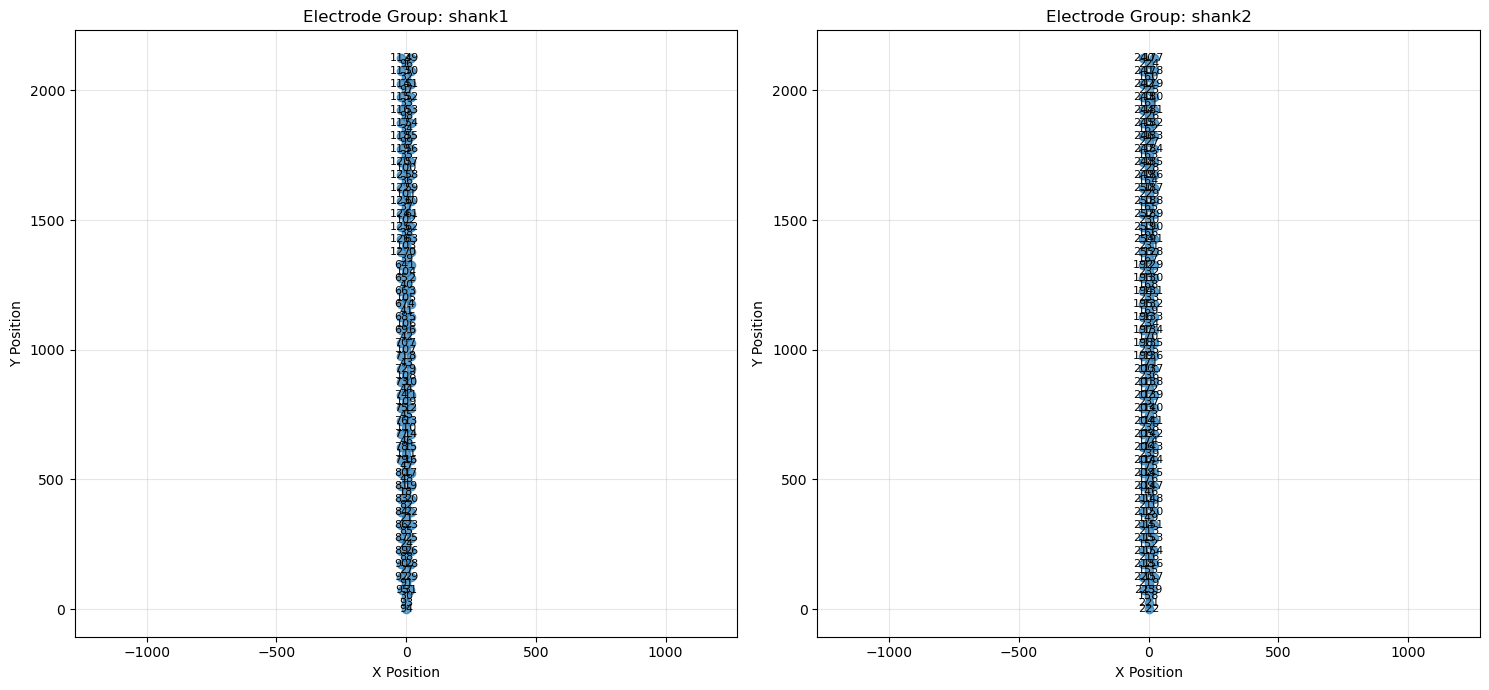

In [18]:
# Reset matplotlib style for the electrode plot
plt.style.use('default')

# Get electrode positions
electrodes_df = nwb.electrodes.to_dataframe()

# Plot electrode positions
plt.figure(figsize=(10, 10))
for group_name in electrodes_df['group_name'].unique():
    group_electrodes = electrodes_df[electrodes_df['group_name'] == group_name]
    plt.scatter(group_electrodes['x'], group_electrodes['y'], 
                label=group_name, alpha=0.7)

plt.title('Electrode Positions')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')  # Equal scaling for x and y
plt.show()

# Let's create a separate plot for each electrode group
plt.figure(figsize=(15, 7))
for i, group_name in enumerate(electrodes_df['group_name'].unique()):
    plt.subplot(1, len(electrodes_df['group_name'].unique()), i+1)
    group_electrodes = electrodes_df[electrodes_df['group_name'] == group_name]
    plt.scatter(group_electrodes['x'], group_electrodes['y'], alpha=0.7)
    for _, electrode in group_electrodes.iterrows():
        plt.text(electrode['x'], electrode['y'], electrode.name, 
                 fontsize=8, ha='center', va='center')
    
    plt.title(f'Electrode Group: {group_name}')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')

plt.tight_layout()
plt.show()

# Return to seaborn style for subsequent plots
sns.set_theme()

## Summary of Findings

In this notebook, we explored Dandiset 001375, which contains electrophysiology data from experiments investigating the effects of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical neural activity.

Key observations include:

1. The dataset contains recordings from two subjects (MS13B and MS14A) with multiple NWB files.
2. Each recording contains both raw electrophysiology data from 256 channels and sorted unit spike times.
3. The recordings were made while the subjects were running laps in a virtual hallway environment, with trial data marking individual laps.
4. There is substantial variation in neural activity between units and between the two subjects.
5. Trial durations show characteristic patterns that might reflect behavioral differences between subjects.
6. The electrodes were arranged in two shanks, recording from both ventral hippocampus and visual cortex.

This initial exploration provides a foundation for more detailed analyses of this dataset, such as:

- Analyzing changes in neural activity related to DREADD activation
- Comparing hippocampal and neocortical activity patterns
- Investigating correlations between neural activity and behavioral performance
- Performing more detailed analyses of spike timing and synchrony
- Examining local field potentials and their relationship to unit activity

## Future Directions

For researchers looking to further analyze this dataset, some potential directions include:

1. **Comparative Analysis**: Compare activity patterns between control and DREADD conditions to identify changes in neural dynamics.

2. **Cross-Regional Coupling**: Analyze the relationship between hippocampal and visual cortex activity to understand cross-regional interactions.

3. **Spectral Analysis**: Perform spectral analyses on the raw data to examine oscillatory activity and how it relates to unit firing.

4. **Behavioral Correlates**: More deeply analyze how neural activity correlates with behavioral metrics across trials.

5. **Network Analysis**: Construct functional connectivity networks from unit spike times to understand the network-level impact of septal GABA disruption.

The code provided in this notebook can serve as a starting point for these more advanced analyses.